In [67]:
import torch
import matplotlib.pyplot as plt

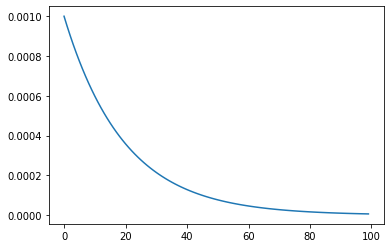

In [70]:
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=.001)
factor = .95
epochs = 100
lambda1 = lambda epoch: factor ** epoch
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda1)

lrs = []

for i in range(epochs):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
    # print("Factor = ", factor ** i," , Learning Rate = ", optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(range(epochs),lrs)
plt.show()

In [ ]:
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=100)
lmbda = lambda epoch: 0.998 ** epoch
scheduler = torch.optim.lr_scheduler.MultiplicativeLR(optimizer, lr_lambda=lmbda)
lrs = []

for i in range(100):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
    # print(f"{i}, Learning Rate: {optimizer.param_groups[0]['lr']}")
    scheduler.step()

plt.plot(range(100),lrs)

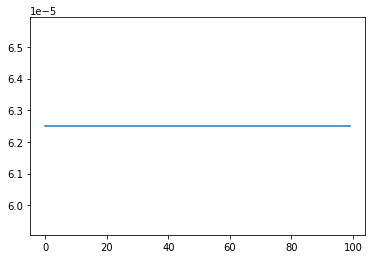

In [66]:
from fairseq.optim.lr_scheduler.polynomial_decay_schedule import PolynomialDecaySchedule
from fairseq.optim.adam import FairseqAdam
model = torch.nn.Linear(2, 1)

class Object(object):
    pass

optim_args = Object()
optim_args.lr = [0.001]
optim_args.adam_betas = "(0.9, 0.98)"
optim_args.adam_eps = 1e-06
optim_args.weight_decay = 0.01

scheduler_args = Object()
scheduler_args.lr = 0.0025, 
scheduler_args.warmup_updates = 40
scheduler_args.total_num_update = 100
scheduler_args.end_learning_rate = 0.0
scheduler_args.power = .1


optimizer = FairseqAdam(optim_args, params=model.parameters())
scheduler = PolynomialDecaySchedule(scheduler_args, optimizer=optimizer)

lrs = []
for i in range(100):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
    # print(f"{i}, Learning Rate: {optimizer.param_groups[0]['lr']}")
    scheduler.step(i)

plt.plot(range(100),lrs)

In [5]:
import torch
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

x = torch.randn(20, 5) #The input is expected to contain raw, unnormalized scores for each class.

y = torch.randint(0, 5, (20,))
print(y)

labels = np.unique(y)
print(labels)
class_weights = compute_class_weight("balanced", classes=labels, y=y.numpy())
class_weights = torch.tensor(class_weights, dtype=torch.float)
print(class_weights)

tensor([0, 0, 3, 0, 3, 3, 0, 3, 3, 2, 2, 2, 3, 3, 0, 0, 2, 4, 4, 0])
[0 2 3 4]
tensor([0.7143, 1.2500, 0.7143, 2.5000])
